#Sentiment Analysis of IMDB reviews using LSTM based Neural Net









* *IMDB- Internet Movie Data-Base * 
* *LSTM - Long Short Term Memory *

### Goal :



Neural networks have shown huge leaps in achieving state of the art results in Prediction and Classification problem settings. They have shown exceptiona; performance in areas where the underlying features are not directly interpretable. This success is attributed to their ability to learn hierarchical representations, unlike traditional meth- ods that rely upon hand-engineered features [Farabet et al., 2013]. Over years the lowering costs of hardware, especially GPU's that can massively parallelize matrix operation tasks have led to renewed interests in neural nets. 



Though initial research was in a standard feedforward net, it soon became apparent that such feed forward nets with dense connections are incapable ot capturing the sequential nature or dependencies in data. Countless  learning tasks are sequential in nature including Time Series, Scene Parsing, Music and Speech generation and text prediction. 



Recurrent Neural nets have started emerging as a new class of neural nets that use a sinple trick of recurrence of the hidden state and sequential exposure to data as a way to capture the sequential dependencies in data. Long Short Term Memory is a type of activation fucntion that has let such RNN's to preserve memory over long sequences. 



In this project we will use LSTM based neural net to predict the sentiment of an IMDB review. We experiement with a standard LSTM with varying hyperparameters including cell size,  number of layers and dropout, we further extend this model to a birectional LSTM 
whereby you have one forward LSTM and one backward LSTM running in reverse time and with their features concatenated at the output layer, thus enabling informations from both past and future to come together. We hypothesise that LSTMs due to their ability to learn sequential dependencies  will be capable of capturing the nature and quirks of review such as sarcasm and reverse humour, which are otehrwise difficult to featureize. 



###Data and Setting:

For this exercise we will be using the Stanford Large movie Dataset, which is essentially a collection of IMDB movie reviews and their coreesponding labels as to whether they are positive or negative in sentiment.


We use Keras, which is a modular wrapper around Theano to build our model 


###Model;

We will initally use a unidirectional Many to one LSTM model


We will extend this model to have many to one bidirectional LSTM 


<img src ="bidirectional-rnn.png">




###Results:

The results though promising are not as good as one's that can be obtained through standard NLP techniques such as 
Topic modelling including TFIDF. The reasoning could be that the data presented is much less leading to overfitting (84.3 % in test vs 86 %)
of the neural nets. We will be havng more experiments with more data.

In [23]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Bidirectional
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
import matplotlib.pyplot as plt

In [6]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

In [7]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [11]:





def unidirectional_lstm (layers, cell_size, embedding, drop ):
    if layers==1:
        model = Sequential()
        model.add(Embedding(top_words, embedding, input_length=max_review_length))
        model.add(LSTM(cell_size))
        model.add(Dropout(drop))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        print(model.summary())
        history=model.fit(X_train, y_train, verbose = 1,validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
    else:
        model = Sequential()
        model.add(Embedding(top_words, embedding, input_length=max_review_length))
        model.add(LSTM(cell_size, return_sequences=True))
        model.add(Dropout(drop))
        model.add(LSTM(cell_size, return_sequences=False))
        model.add(Dropout(drop))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        print(model.summary())
        history=model.fit(X_train, y_train, verbose = 1,validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
    return (history.history)



In [50]:
LSTM_size=[ 64,128] 
layers=[1,2]
embedding_vec=[64] 
drop=[0.2] #0,0.1,
acc_history_f={}
model_hist_f=[]
for layer in layers:
    for cells in LSTM_size:
        for embedd in embedding_vec:
            for drops in drop:
                model_hist_f.append([layer, cells, embedd, drops])
                
                acc_history_f[len(model_hist_f)-1]=unidirectional_lstm(layer, cells, embedd, drops)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_34 (Embedding)         (None, 500, 64)       320000      embedding_input_34[0][0]         
____________________________________________________________________________________________________
lstm_56 (LSTM)                   (None, 64)            33024       embedding_34[0][0]               
____________________________________________________________________________________________________
dropout_55 (Dropout)             (None, 64)            0           lstm_56[0][0]                    
____________________________________________________________________________________________________
dense_33 (Dense)                 (None, 1)             65          dropout_55[0][0]                 
Total params: 353089
______________________________________________________________________

In [51]:
import numpy as np
a=acc_history_f
a

{0: {'acc': [0.78700000003814696, 0.89007999999999998, 0.9157200000190735],
  'loss': [0.46857956207513807, 0.277887389793396, 0.22046311844348906],
  'val_acc': [0.86592000000000002, 0.86731999998092646, 0.86624000000000001],
  'val_loss': [0.3347693172264099, 0.31569287712097166, 0.30642190629959104]},
 1: {'acc': [0.7818400000190735, 0.86507999998092655, 0.89212000001907343],
  'loss': [0.45431251289367675, 0.32137985484123233, 0.27443340140342715],
  'val_acc': [0.86716000001907345, 0.83728000003814695, 0.86260000001907344],
  'val_loss': [0.32347978977680208, 0.38638455322265625, 0.32302049542427064]},
 2: {'acc': [0.80676000000000003, 0.89119999998092647, 0.91411999998092652],
  'loss': [0.41959651313781737, 0.27612089818954466, 0.22511565991401672],
  'val_acc': [0.85063999996185302, 0.859640000038147, 0.87347999998092651],
  'val_loss': [0.3602969309425354, 0.331145565700531, 0.30141286253929139]},
 3: {'acc': [0.76107999996185305, 0.88299999996185308, 0.89263999999999999],
  '

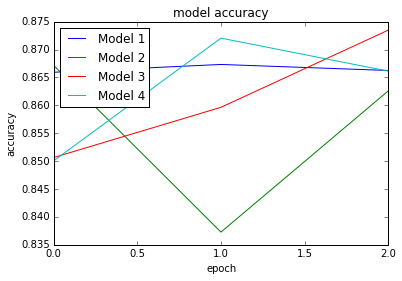

In [56]:
%matplotlib inline
for i in range(len(model_hist_f)):
    plt.plot(acc_history_f[i]["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["Model 1", "Model 2" , "Model 3", "Model 4"], loc='upper left')
plt.show()

In [ ]:

# Bidirectional LSTM:


In [83]:
def bidirectional (cell_size, embedding, drop):
    model_bi=Sequential()
    model_bi.add(Embedding(top_words, embedding, input_length=max_review_length))
    model_bi.add(Bidirectional(LSTM(cell_size)))
    model_bi.add(Dropout(drop))
    model_bi.add(Dense(1, activation='sigmoid'))
    model_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model_bi.summary())
    history=model_bi.fit(X_train, y_train, verbose = 1,validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
    return (history.history)

In [84]:
LSTM_size=[128, 256]
embedding_vec=[64, 128]
drop=[ 0.5]
acc_history={}
model_hist=[]
for cells in LSTM_size:
    for embedd in embedding_vec:
        for drops in drop:
            model_hist.append([cells, embedd, drops])
                
            acc_history[len(model_hist)-1]=bidirectional(cells, embedd, drops)



____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_40 (Embedding)         (None, 500, 64)       320000      embedding_input_40[0][0]         
____________________________________________________________________________________________________
bidirectional_3 (Bidirectional)  (None, 256)           197632      embedding_40[0][0]               
____________________________________________________________________________________________________
dropout_63 (Dropout)             (None, 256)           0           bidirectional_3[0][0]            
____________________________________________________________________________________________________
dense_39 (Dense)                 (None, 1)             257         dropout_63[0][0]                 
Total params: 517889
______________________________________________________________________

KeyboardInterrupt: 

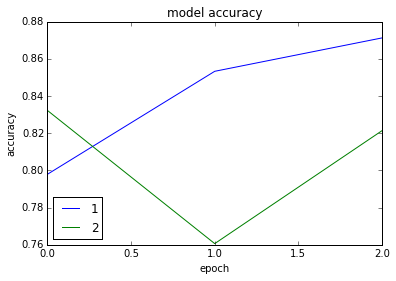

In [87]:

for i in range(2):
    plt.plot(acc_history[i]["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
legend=[1,2,3,4,5,6,7,8,9,10,11,1]
plt.legend(legend, loc='lower left')
plt.show()

In [88]:
# Best Model :

#Uni-Directional LSTM
best_model_f=None
max_val=0
for i in range(len(model_hist_f)):
    max_val_acc=np.argmax(acc_history_f[i]["val_acc"])
    if max_val<=acc_history_f[i]["val_acc"][max_val_acc] :
        max_val=acc_history_f[i]["val_acc"][max_val_acc]
        best_model_f=model_hist_f[i]
    else:
        pass

    
print (best_model)

[2, 128, 64, 0.2]


In [90]:
#Uni-Directional LSTM
best_model_bi=None
max_val=0
for i in range(2):
    max_val_acc=np.argmax(acc_history[i]["val_acc"])
    if max_val<=acc_history[i]["val_acc"][max_val_acc] :
        max_val=acc_history[i]["val_acc"][max_val_acc]
        best_model=model_hist[i]
    else:
        pass

    
print (best_model)

[128, 64, 0.5]


In [95]:
## Running our best model

model = Sequential()
model.add(Embedding(top_words, 64, input_length=max_review_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, verbose = 1,validation_data=(X_test, y_test), nb_epoch=2, batch_size=64)



# Final evaluation of the model
scores_uni= model.evaluate(X_test, y_test, verbose=0)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_47 (Embedding)         (None, 500, 64)       320000      embedding_input_47[0][0]         
____________________________________________________________________________________________________
lstm_75 (LSTM)                   (None, 500, 128)      98816       embedding_47[0][0]               
____________________________________________________________________________________________________
dropout_74 (Dropout)             (None, 500, 128)      0           lstm_75[0][0]                    
____________________________________________________________________________________________________
lstm_76 (LSTM)                   (None, 128)           131584      dropout_74[0][0]                 
___________________________________________________________________________________________

NameError: name 'scores' is not defined

In [96]:
print("Accuracy - Unidirectional LSTM: %.2f%%" % (scores_uni[1]*100))



Accuracy - Unidirectional LSTM: 84.32%
